This is an introduction to evolutionary computation in Python with NumPy.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import random as rdm

In [51]:
class Mutation:
    def __init__(self, value, fit):
        self.value = value
        self.fit = fit

    def __gt__(self, mutation2):
        return self.fit > mutation2.fit

    def __str__(self):
        return "Mutation-Fitness: " + str(self.fit)

def sphere(value):
    return np.dot(value.T, value)

def crossover(parent1, parent2):
    return (parent1.value + parent2.value) / 2


In [52]:
n = 5
x = 2 * np.ones(n)

The first generation is: Mutation-Fitness: 28.54118344798748, Mutation-Fitness: 20.797254332451597, Mutation-Fitness: 11.126711262232636, Mutation-Fitness: 14.891323529857797, Mutation-Fitness: 17.520822092637587, Mutation-Fitness: 18.754827394208533, Mutation-Fitness: 17.793345186003904, Mutation-Fitness: 32.218135221906905, Mutation-Fitness: 28.534272384746945, Mutation-Fitness: 25.12821838519924, Mutation-Fitness: 20.673040585226893, Mutation-Fitness: 18.701341991232653, Mutation-Fitness: 38.479466637583634, Mutation-Fitness: 25.160395974049635, Mutation-Fitness: 32.17435434249524, Mutation-Fitness: 20.425744640685878, Mutation-Fitness: 35.8406034240534, Mutation-Fitness: 53.26123962269725, Mutation-Fitness: 24.694579344830494



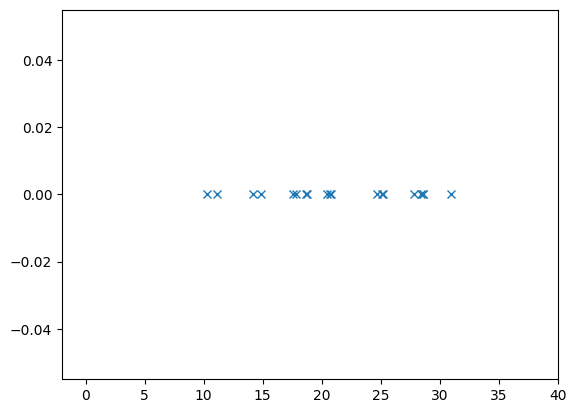

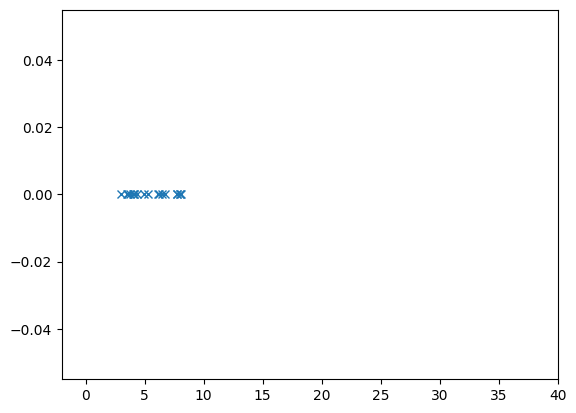

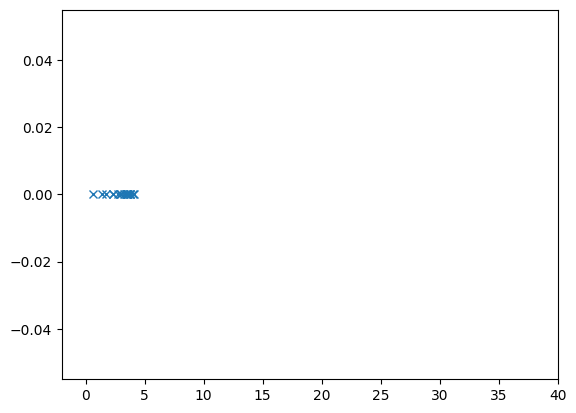

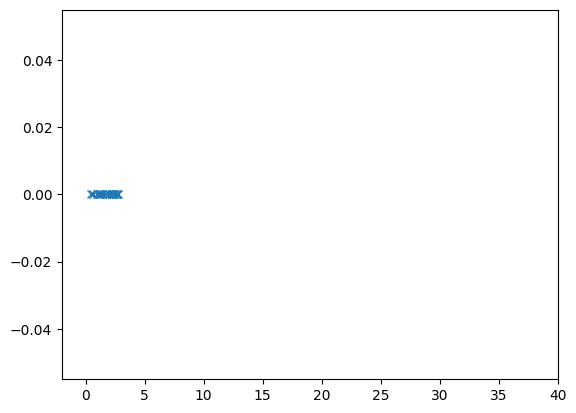

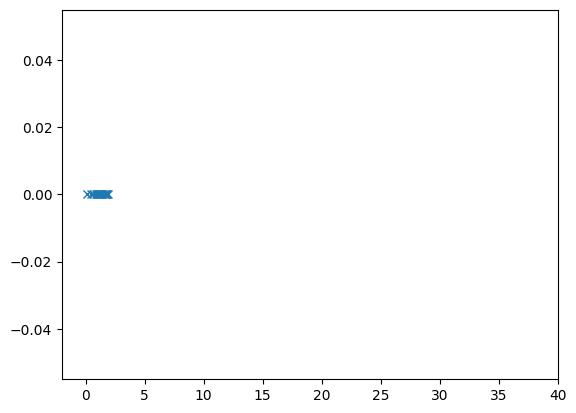

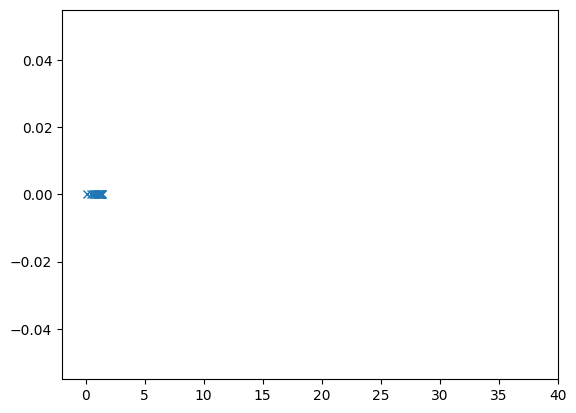

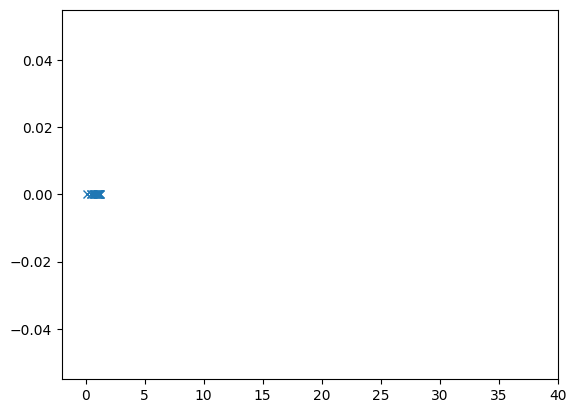

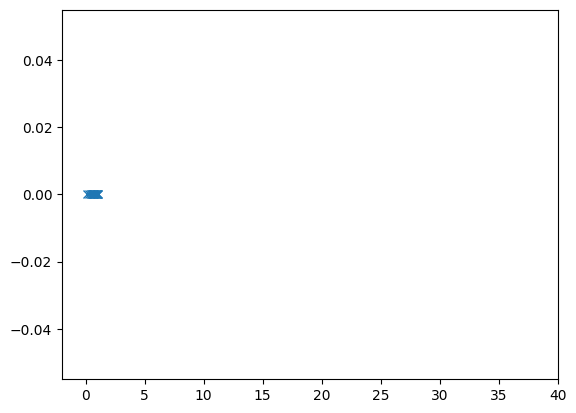

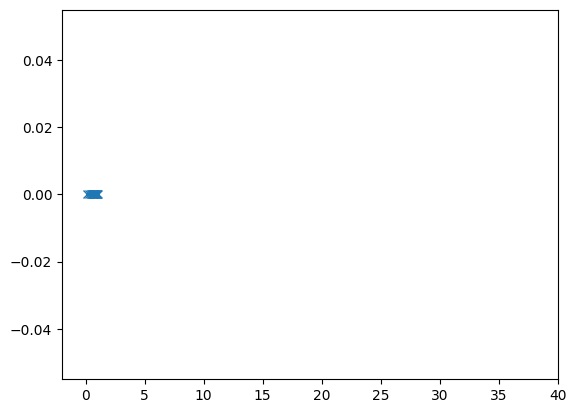

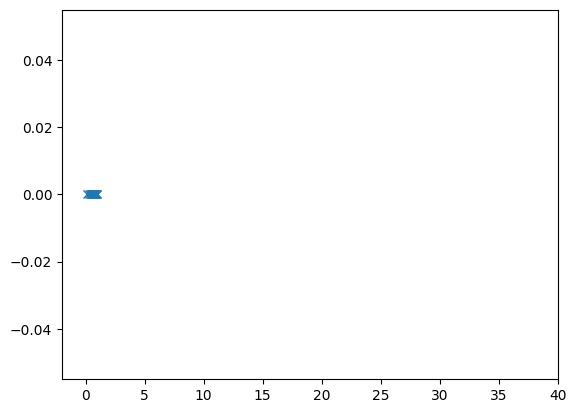

The last generation is: Mutation-Fitness: 0.1379913426293776, Mutation-Fitness: 0.3051704123325825, Mutation-Fitness: 0.4336737846323472, Mutation-Fitness: 0.4497060175520325, Mutation-Fitness: 0.4603164086973617, Mutation-Fitness: 0.5072428973213757, Mutation-Fitness: 0.5822678586212333, Mutation-Fitness: 0.5931038562695721, Mutation-Fitness: 0.6026631830836503, Mutation-Fitness: 0.6392737549696342, Mutation-Fitness: 0.6571293770349858, Mutation-Fitness: 0.6954947022491562, Mutation-Fitness: 0.7135811718059264, Mutation-Fitness: 0.7440198522963942, Mutation-Fitness: 0.7563066898070925, Mutation-Fitness: 0.7622559501947146, Mutation-Fitness: 0.7759578299586547, Mutation-Fitness: 0.7761728337059777, Mutation-Fitness: 0.7817771659818417


In [53]:
generation = 0
sigma = 1.0
parents_mhu = 20
mutations_lambda = 10
population = []

# Generate initial mhu parents for population
for i in range(1, parents_mhu):
    x_ = x + sigma * np.random.randn(n)
    fitness = sphere(x_)

    mutation = Mutation(x_, fitness)
    population.append(mutation)
print("The first generation is:", ", ".join([str(m) for m in population]))
print()

# Compute 100 generations
while generation < 100:
    # Crossover with 2 parents and intermediate recombination by mean value (repeat for number of mutations)
    for i in range(1, mutations_lambda):
        first_parent = rdm.randrange(len(population))
        second_parent = rdm.randrange(len(population))
        mean_value = crossover(population[first_parent], population[second_parent])
        # Mutation
        mean_value_ = mean_value + sigma * np.random.randn(n)
        fitness_ = sphere(mean_value_)

        mutation = Mutation(mean_value_, fitness_)
        population.append(mutation)

    # Now select the best (minimal) mhu parents out of complete population (parent + mutations)
    population.sort()
    population = population[:parents_mhu - 1]

    # Show actual distribution of fitness among population
    if generation % 10 == 0:
        plt.plot([p.fit for p in population], np.zeros_like([p.fit for p in population]), 'x')
        plt.xlim(-2, 40)
        plt.show()

    generation += 1

# Return the last generation
print("The last generation is:", ", ".join([str(m) for m in population]))